In [3]:
!pip install brian2
from brian2 import *
prefs.codegen.target = "numpy"
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.7 MB/s eta 0:00:00


Starting simulation at t=0. s for a duration of 100. s
2.3296 s (2%) simulated in 10s, estimated 6m 59s remaining.
6.6351 s (6%) simulated in 20s, estimated 4m 41s remaining.
11.3742 s (11%) simulated in 30s, estimated 3m 54s remaining.
15.6641 s (15%) simulated in 40s, estimated 3m 35s remaining.
19.9832 s (19%) simulated in 50s, estimated 3m 20s remaining.
24.3371 s (24%) simulated in 1m 0s, estimated 3m 7s remaining.
28.9209 s (28%) simulated in 1m 10s, estimated 2m 52s remaining.
33.4659 s (33%) simulated in 1m 20s, estimated 2m 39s remaining.
37.8305 s (37%) simulated in 1m 30s, estimated 2m 28s remaining.
42.1842 s (42%) simulated in 1m 40s, estimated 2m 17s remaining.
46.2169 s (46%) simulated in 1m 50s, estimated 2m 8s remaining.
50.9766 s (50%) simulated in 2m 0s, estimated 1m 55s remaining.
54.8739 s (54%) simulated in 2m 10s, estimated 1m 47s remaining.
59.1988 s (59%) simulated in 2m 20s, estimated 1m 36s remaining.
63.396 s (63%) simulated in 2m 30s, estimated 1m 27s remai

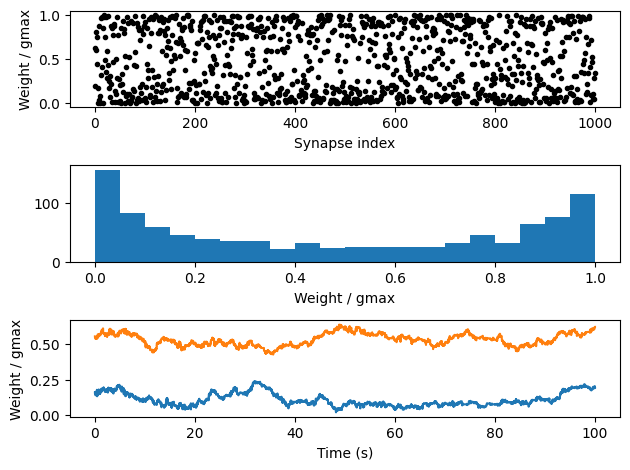

In [4]:
from brian2 import *

N = 1000
taum = 10*ms
taupre = 20*ms
taupost = taupre
Ee = 0*mV
vt = -54*mV
vr = -60*mV
El = -74*mV
taue = 5*ms
F = 15*Hz
gmax = .01
dApre = .01
dApost = -dApre * taupre / taupost * 1.05
dApost *= gmax
dApre *= gmax

eqs_neurons = '''
dv/dt = (ge * (Ee-v) + El - v) / taum : volt
dge/dt = -ge / taue : 1
'''

poisson_input = PoissonGroup(N, rates=F)
neurons = NeuronGroup(1, eqs_neurons, threshold='v>vt', reset='v = vr',
                      method='euler')
S = Synapses(poisson_input, neurons,
             '''w : 1
                dApre/dt = -Apre / taupre : 1 (event-driven)
                dApost/dt = -Apost / taupost : 1 (event-driven)''',
             on_pre='''ge += w
                    Apre += dApre
                    w = clip(w + Apost, 0, gmax)''',
             on_post='''Apost += dApost
                     w = clip(w + Apre, 0, gmax)''',
             )
S.connect()
S.w = 'rand() * gmax'
mon = StateMonitor(S, 'w', record=[0, 1])
s_mon = SpikeMonitor(poisson_input)

run(100*second, report='text')

subplot(311)
plot(S.w / gmax, '.k')
ylabel('Weight / gmax')
xlabel('Synapse index')
subplot(312)
hist(S.w / gmax, 20)
xlabel('Weight / gmax')
subplot(313)
plot(mon.t/second, mon.w.T/gmax)
xlabel('Time (s)')
ylabel('Weight / gmax')
tight_layout()
show()